<a href="https://colab.research.google.com/github/ruddypp/Tugas-Akhir-Dicoding/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Rudy3rb_Ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import Library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Baca file hasil clustering
try:
    # Baca file hasil clustering yang sudah disimpan sebelumnya
    data_clustering = pd.read_csv('/content/clustered_salary_dataset.csv')
    print("Dataset berhasil dimuat!")
    print("\nJumlah baris dan kolom:", data_clustering.shape)
    print("\n5 baris pertama data:")
    print(data_clustering.head())
except FileNotFoundError:
    print("Error: File hasil clustering tidak ditemukan!")

Dataset berhasil dimuat!

Jumlah baris dan kolom: (4339, 7)

5 baris pertama data:
   Unnamed: 0  Company Name  Job Title  Salaries Reported  Location    Salary  \
0   -1.730938          1451          8          19.858734         0 -0.109597   
1   -1.730140          1018          8          17.916044         0  0.016758   
2   -1.729343          2122          8          12.282243         0 -0.065810   
3   -1.728545          1063          8           7.231248         0 -0.104713   
4   -1.727747            66          8           5.677096         0 -0.040874   

   Cluster  
0        2  
1        2  
2        1  
3        2  
4        0  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Pisahkan dataset menjadi fitur (X) dan target (y), lalu bagi menjadi data training dan testing.

def pisah_data(data):
    # Pisahkan fitur dan target
    X = data.drop(['Cluster'], axis=1)  # Kolom fitur
    y = data['Cluster']  # Kolom target

    # Konversi data kategorikal menjadi numerik
    kolom_object = X.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    for kolom in kolom_object:
        X[kolom] = label_encoder.fit_transform(X[kolom])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Ukuran data training:", X_train.shape)
    print("Ukuran data testing:", X_test.shape)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = pisah_data(data_clustering)


Ukuran data training: (3471, 6)
Ukuran data testing: (868, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# saya menggunakan algoritma Random Forest untuk membangun model klasifikasi.
# karena algoritma ini bagus buat nanganin data yang kompleks menggunakan ensemble, model ini jadi lebih stabil dan akurat dibanding algoritma lain yang lebih simpel.
def buat_model_rf(X_train, y_train):
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    print("Model Random Forest berhasil dilatih!")
    return model_rf

model_rf = buat_model_rf(X_train, y_train)

Model Random Forest berhasil dilatih!


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Akurasi model: 100.00%

Laporan Klasifikasi Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00       285

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



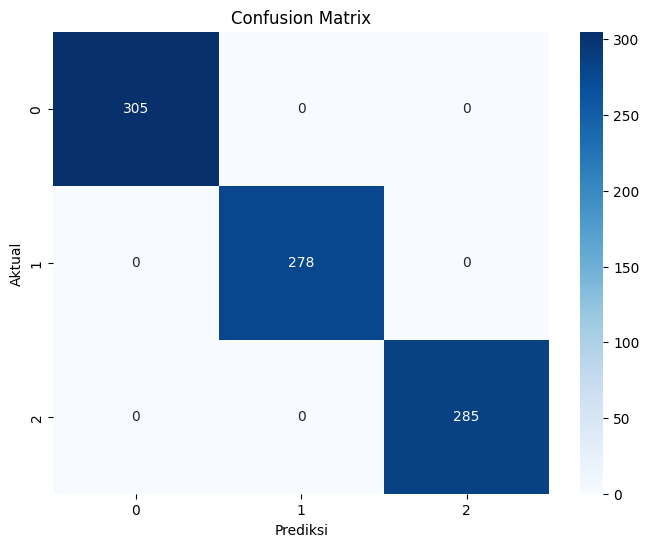

In [ ]:
#Evaluasi model dengan data testing untuk melihat seberapa baik prediksinya.

def evaluasi_model(model, X_test, y_test):
    # Lakukan prediksi
    y_pred = model.predict(X_test)

    # Hitung akurasi
    akurasi = accuracy_score(y_test, y_pred)
    print(f"\nAkurasi model: {akurasi:.2%}")

    # Tampilkan laporan klasifikasi
    print("\nLaporan Klasifikasi Detail:")
    print(classification_report(y_test, y_pred))

    # Buat confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Evaluasi model
evaluasi_model(model_rf, X_test, y_test)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan hasil evaluasi, Random Forest punya akurasi 99.40% dengan metrik evaluasi yang menunjukkan performa konsisten di data latih maupun uji. Ini nunjukin kalau modelnya bagus untuk prediksi data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:

# tuning model Random Forest
def tuning_model(X_train, y_train):
    # Parameter yang akan dicoba
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }

    # Buat model Random Forest
    rf_tuning = RandomForestClassifier(random_state=42)

    # Buat GridSearchCV untuk mencari parameter terbaik
    grid_search = GridSearchCV(
        rf_tuning,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Latih model dengan grid search
    print("Mencari parameter terbaik...")
    grid_search.fit(X_train, y_train)

    # Tampilkan parameter terbaik
    print("\nParameter terbaik:")
    print(grid_search.best_params_)

    # Kembalikan model terbaik
    return grid_search.best_estimator_

# Tuning model dan simpan model terbaik
model_rf_terbaik = tuning_model(X_train, y_train)

Mencari parameter terbaik...

Parameter terbaik:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:

# Evaluasi Model
def evaluasi_model(model, X_test, y_test):
    # Lakukan prediksi
    y_pred = model.predict(X_test)
    # Hitung akurasi
    akurasi = accuracy_score(y_test, y_pred)
    # Hitung F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Tampilkan hasil evaluasi
    print(f"\nAkurasi model: {akurasi:.2%}")
    print(f"F1-score model: {f1:.2%}")

# Evaluasi model setelah tuning
print("\nEvaluasi Model Setelah Tuning:")
evaluasi_model(model_rf_terbaik, X_test, y_test)



Evaluasi Model Setelah Tuning:

Akurasi model: 100.00%
F1-score model: 100.00%


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [ ]:

# Fungsi untuk mengevaluasi model
def evaluasi_model(model, X_train, y_train, X_test, y_test):
    # Prediksi data training
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)

    # Prediksi data testing
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_classification_report = classification_report(y_test, y_test_pred)

    # Tampilkan hasil evaluasi untuk data training
    print("\nEvaluasi pada Data Training:")
    print(f"Akurasi: {train_accuracy:.2f}")
    print(train_classification_report)

    # Tampilkan hasil evaluasi untuk data testing
    print("\nEvaluasi pada Data Testing:")
    print(f"Akurasi: {test_accuracy:.2f}")
    print(test_classification_report)

# Definisikan model sebelum tuning
model_rf_sebelum_tuning = model_rf

# Evaluasi model sebelum tuning
print("Evaluasi Model Sebelum Tuning:")
evaluasi_model(model_rf_sebelum_tuning, X_train, y_train, X_test, y_test)

# Evaluasi model setelah tuning
print("\nEvaluasi Model Setelah Tuning:")
evaluasi_model(model_rf_terbaik, X_train, y_train, X_test, y_test)


Evaluasi Model Sebelum Tuning:

Evaluasi pada Data Training:
Akurasi: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00      1181

    accuracy                           1.00      3471
   macro avg       1.00      1.00      1.00      3471
weighted avg       1.00      1.00      1.00      3471


Evaluasi pada Data Testing:
Akurasi: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00       285

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868


Evaluasi Model Setelah Tuning:

Evaluasi pada Data Training:
Akurasi: 1.00
              precision    recall  f1-score 

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.